In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163327 sha256=954d807f57c4762022b8d020c04432e989e2bb28de1d5f7529df539a12b13c3d
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [1]:
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, SVD, NMF
# from google.colab import files
# uploaded = files.upload()
# import io
# df1=pd.read_csv(io.BytesIO(uploaded['Processed_Book_Data_shortened.csv']))
df=pd.read_csv('Processed_Book_Data_shortened.csv')
df.head()

,0,user_id,isbn,rating,book_title,book_author,publisher,img_s,Summary,Language,Category
0,0,2,195153448,0,Classical Mythology,Mark P. O. Morford,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science']
1,1,8,2005018,5,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses']
2,2,11400,2005018,0,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses']
3,3,11676,2005018,8,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses']
4,4,41385,2005018,0,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses']


In [2]:
df.shape

(258879, 11)

In [3]:
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split
reader = Reader()
data = Dataset.load_from_df(df[['user_id', 'isbn', 'rating']], reader)
train, test = train_test_split(data, test_size=0.25, random_state=1)

Trying different number of factors to see if this parameter affects the performance of the model.  
The default number of factors is 100, hence we will tweak the number of factors from 1-100 to evaluate the performance.

In [4]:
import time
from collections import defaultdict

# A dictionary to store the rsme, fit time and prediction time 
nmf_dict = defaultdict(dict)
for i in range(100):
    nmf = NMF(n_factors=i+1)
    start_time = time.time()
    nmf.fit(train)
    fit_time = time.time() - start_time
    predictions = nmf.test(test)
    nmf_dict[i+1]['rmse'] = rmse(predictions)
    nmf_dict[i+1]['fit_time'] = fit_time
    nmf_dict[i+1]['prediction_time'] = time.time() - start_time - fit_time

# A dataframe to store the results
nmf_df = pd.DataFrame(nmf_dict)
nmf_df

RMSE: 3.7904
RMSE: 3.8119
RMSE: 3.8376
RMSE: 3.8447
RMSE: 3.8650
RMSE: 3.8685
RMSE: 3.8738
RMSE: 3.8699
RMSE: 3.8732
RMSE: 3.8811
RMSE: 3.8856
RMSE: 3.8870
RMSE: 3.8862
RMSE: 3.8823
RMSE: 3.8896
RMSE: 3.8869
RMSE: 3.8925
RMSE: 3.8948
RMSE: 3.8876
RMSE: 3.8874
RMSE: 3.8815
RMSE: 3.8903
RMSE: 3.8862
RMSE: 3.8891
RMSE: 3.8820
RMSE: 3.8824
RMSE: 3.8930
RMSE: 3.8831
RMSE: 3.8858
RMSE: 3.8857
RMSE: 3.8807
RMSE: 3.8813
RMSE: 3.8851
RMSE: 3.8811
RMSE: 3.8785
RMSE: 3.8718
RMSE: 3.8860
RMSE: 3.8765
RMSE: 3.8786
RMSE: 3.8760
RMSE: 3.8730
RMSE: 3.8765
RMSE: 3.8801
RMSE: 3.8818
RMSE: 3.8709
RMSE: 3.8771
RMSE: 3.8751
RMSE: 3.8618
RMSE: 3.8682
RMSE: 3.8621
RMSE: 3.8723
RMSE: 3.8756
RMSE: 3.8713
RMSE: 3.8701
RMSE: 3.8622
RMSE: 3.8665
RMSE: 3.8641
RMSE: 3.8666
RMSE: 3.8724
RMSE: 3.8616
RMSE: 3.8628
RMSE: 3.8592
RMSE: 3.8617
RMSE: 3.8635
RMSE: 3.8578
RMSE: 3.8590
RMSE: 3.8601
RMSE: 3.8536
RMSE: 3.8570
RMSE: 3.8579
RMSE: 3.8553
RMSE: 3.8625
RMSE: 3.8603
RMSE: 3.8647
RMSE: 3.8522
RMSE: 3.8517
RMSE: 3.8563

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
rmse,3.790395,3.811918,3.837565,3.844673,3.865015,3.868541,3.873840,3.869938,3.873241,3.881057,...,3.841521,3.848957,3.843112,3.845957,3.842377,3.844011,3.841286,3.844652,3.848285,3.841309
fit_time,3.354013,3.413447,3.429688,3.580585,3.758752,3.788720,3.650439,3.814075,4.074004,4.215324,...,12.677665,15.086124,12.099893,13.311424,17.101015,11.800569,12.969527,13.851671,12.226467,12.968224
prediction_time,0.313615,0.339202,0.335890,0.323706,0.342110,0.326997,0.321004,0.314780,0.314310,0.243368,...,0.336473,0.325848,0.321073,0.232239,0.274521,0.314233,0.332336,0.292756,0.465880,0.256572


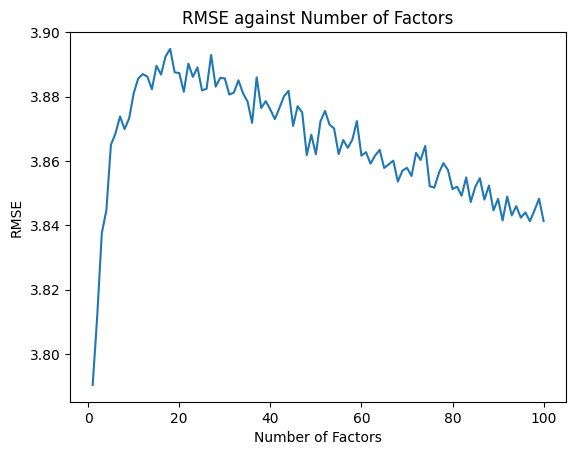

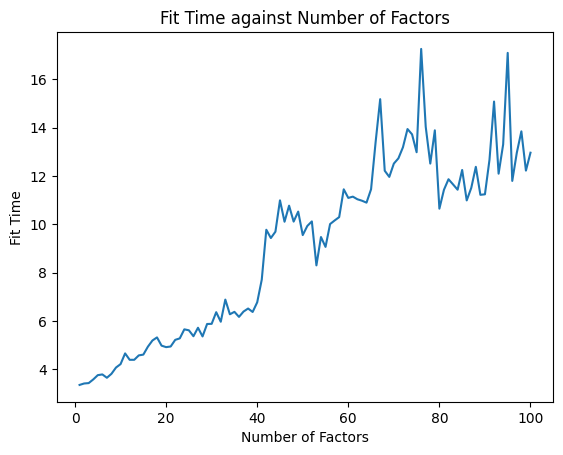

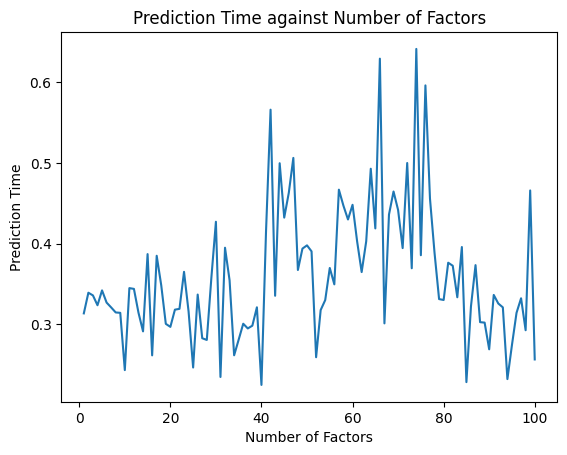

In [5]:
# Plot the RMSE, fit time and prediction time against the number of factors
import matplotlib.pyplot as plt
plt.plot(nmf_df.loc['rmse'])
plt.xlabel('Number of Factors')
plt.ylabel('RMSE')
plt.title('RMSE against Number of Factors')
plt.show()

plt.plot(nmf_df.loc['fit_time'])
plt.xlabel('Number of Factors')
plt.ylabel('Fit Time')
plt.title('Fit Time against Number of Factors')
plt.show()

plt.plot(nmf_df.loc['prediction_time'])
plt.xlabel('Number of Factors')
plt.ylabel('Prediction Time')
plt.title('Prediction Time against Number of Factors')
plt.show()


We will be using the default parameters set in the NMF for our comparison between the different algorithms.

In [6]:
import time
nmf = NMF()
begin_fit = time.time()
nmf.fit(train)
end_fit = time.time()
begin_predict = time.time()
end_predict = time.time()
nmf.test(test)
result = rmse(nmf.test(test))
row = {"Algorithm":"NMF","Fit Time":end_fit-begin_fit,"Prediction Time":end_predict-begin_predict}
print(row)

RMSE: 3.8834
{'Algorithm': 'NMF', 'Fit Time': 4.769976854324341, 'Prediction Time': 0.0}


In [7]:
testdf = pd.DataFrame(test)
testdf = testdf.rename(columns={
    0: "User-ID",
    1: "isbn",
    2: "Actual Rating"
})
testdf["Predicted Rating"] = -1
testdf["Error"] = -1
for index, row in testdf.iterrows():
  testdf.loc[index, 'Predicted Rating'] = nmf.predict(row["User-ID"], row["isbn"], row["Actual Rating"]).est
for index, row in testdf.iterrows():
  testdf.loc[index, 'Error'] = '{:.2f}'.format(abs(row["Predicted Rating"] - row["Actual Rating"]))

testdf

,User-ID,isbn,Actual Rating,Predicted Rating,Error
0,35609,8420636282,9.0,3.137990,5.86
1,30711,449221482,8.0,1.000000,7.00
2,266866,006052779X,0.0,3.137990,3.14
3,265115,446605239,0.0,1.944524,1.94
4,189835,440498058,5.0,3.869903,1.13
...,...,...,...,...,...
64715,265784,836221192,0.0,1.965710,1.97
64716,117937,553582747,0.0,3.137990,3.14
64717,114988,142002267,0.0,5.000000,5.00
64718,187145,399150897,0.0,2.451024,2.45


In [8]:
worst_predictions = testdf.sort_values(by='Error',ascending=False)[:50]
best_predictions = testdf.sort_values(by='Error',ascending=False)[-50:]

best_predictions

,User-ID,isbn,Actual Rating,Predicted Rating,Error
48030,70666,345378482,5.0,5.00000,0.00
37823,44852,1559703237,5.0,5.00000,0.00
53381,11676,60652934,5.0,5.00000,0.00
59328,276231,671000306,5.0,5.00000,0.00
56940,104243,399143947,5.0,5.00000,0.00
48109,189835,425104338,5.0,4.99715,0.00
30880,123544,553280414,5.0,5.00000,0.00
30884,55187,440213290,5.0,5.00000,0.00
53354,72347,971880107,1.0,1.00000,0.00
5206,209625,345370775,5.0,5.00000,0.00


In [9]:
worst_predictions

,User-ID,isbn,Actual Rating,Predicted Rating,Error
54198,69775,425153975,10.0,1.0,9.00
3131,93562,446613266,10.0,1.0,9.00
54438,2891,571169341,10.0,1.0,9.00
24512,4385,084394272X,10.0,1.0,9.00
31953,41058,446609323,10.0,1.0,9.00
18136,36836,345334531,10.0,1.0,9.00
24470,753,679420118,10.0,1.0,9.00
18150,232131,671003755,10.0,1.0,9.00
61566,197659,039447970X,10.0,1.0,9.00
46165,81045,312995423,10.0,1.0,9.00
